In [ ]:
%pylab inline
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
df = pd.read_csv('/content/TTWO.csv', ',', index_col=['Date'], parse_dates=['Date'], dayfirst=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df = df.drop(['Open', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1)
df

High
Date                  
1997-04-15    3.916667
1997-04-16    4.166667
1997-04-17    4.083333
1997-04-18    4.000000
1997-04-21    4.000000
...                ...
2022-03-18  153.199997
2022-03-21  152.820007
2022-03-22  154.479996
2022-03-23  152.529999
2022-03-24  150.679993

[6279 rows x 1 columns]

In [ ]:
df.plot(figsize=(15,7))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6279 entries, 1997-04-15 to 2022-03-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    6279 non-null   float64
dtypes: float64(1)
memory usage: 98.1 KB


In [ ]:
df_month = pd.DataFrame(df['High'].resample("1M").mean())
df_month

High
Date                  
1997-04-30    4.440972
1997-05-31    5.305556
1997-06-30    5.644841
1997-07-31    5.494318
1997-08-31    5.098214
...                ...
2021-11-30  181.053810
2021-12-31  173.897272
2022-01-31  164.726501
2022-02-28  168.896842
2022-03-31  155.845000

[300 rows x 1 columns]

In [ ]:
df_month.plot(figsize=(15,7))

In [ ]:
plt.figure(figsize(15,7))
sm.tsa.seasonal_decompose(df_month.High).plot()
print("Критерий Дики-Фулера: p-%f"%sm.tsa.stattools.adfuller(df_month.High)[1])

Критерий Дики-Фулера: p-0.957106


<Figure size 1080x504 with 0 Axes>

In [ ]:
df_month['High_box'], lmbda = stats.boxcox(df_month.High)
df_month.High_box.plot(figsize=(15,7))
plt.ylabel(u'Transformed salary')
print('Оптимальный параметр преобразования Бокса-Кокса: %f' % lmbda)
print("Критерий Дики-Фулера: p=%f"%sm.tsa.stattools.adfuller(df_month.High_box)[1])

Оптимальный параметр преобразования Бокса-Кокса: -0.298160
Критерий Дики-Фулера: p=0.726018


In [ ]:
df_month['High_box_diff_S'] = df_month.High_box - df_month.High_box.shift(12)
df_month

High  High_box  High_box_diff_S
Date                                             
1997-04-30    4.440972  1.203606              NaN
1997-05-31    5.305556  1.314680              NaN
1997-06-30    5.644841  1.352023              NaN
1997-07-31    5.494318  1.335826              NaN
1997-08-31    5.098214  1.290297              NaN
...                ...       ...              ...
2021-11-30  181.053810  2.642094         0.016068
2021-12-31  173.897272  2.633484        -0.025179
2022-01-31  164.726501  2.621752        -0.046607
2022-02-28  168.896842  2.627189        -0.035649
2022-03-31  155.845000  2.609552        -0.026066

[300 rows x 3 columns]

Критерий Дики-Фулера: p=0.014341


<Figure size 1080x504 with 0 Axes>

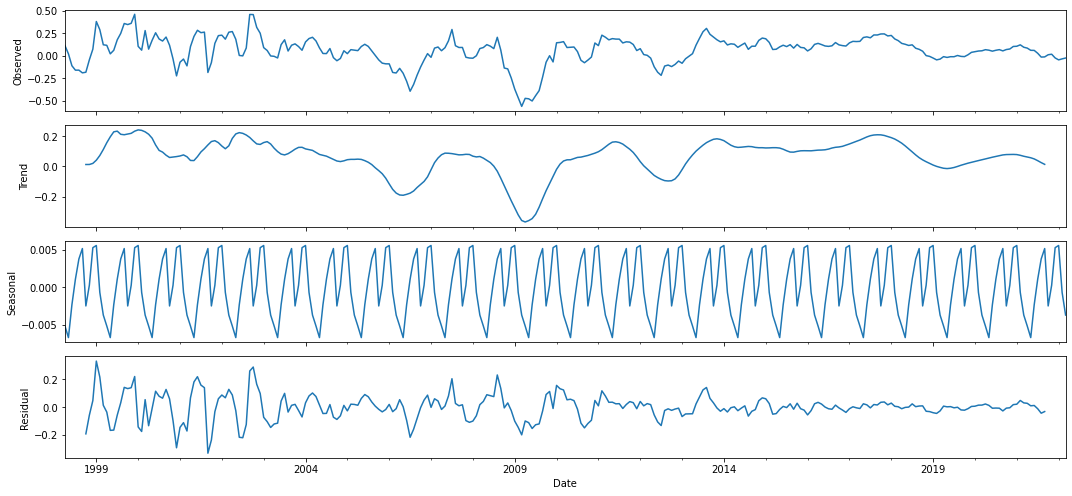

In [ ]:
plt.figure(figsize(15,7))
sm.tsa.seasonal_decompose(df_month.High_box_diff_S[12:]).plot()
print("Критерий Дики-Фулера: p=%f" % sm.tsa.stattools.adfuller(df_month.High_box_diff_S[12:])[1])

In [ ]:
df_month['High_box_diff_S_T'] = df_month.High_box_diff_S - df_month.High_box_diff_S.shift(1)
df_month

High  High_box  High_box_diff_S  High_box_diff_S_T
Date                                                                
1997-04-30    4.440972  1.203606              NaN                NaN
1997-05-31    5.305556  1.314680              NaN                NaN
1997-06-30    5.644841  1.352023              NaN                NaN
1997-07-31    5.494318  1.335826              NaN                NaN
1997-08-31    5.098214  1.290297              NaN                NaN
...                ...       ...              ...                ...
2021-11-30  181.053810  2.642094         0.016068           0.005944
2021-12-31  173.897272  2.633484        -0.025179          -0.041247
2022-01-31  164.726501  2.621752        -0.046607          -0.021428
2022-02-28  168.896842  2.627189        -0.035649           0.010957
2022-03-31  155.845000  2.609552        -0.026066           0.009583

[300 rows x 4 columns]

In [ ]:
plt.figure(figsize(15,7))
sm.tsa.seasonal_decompose(df_month.High_box_diff_S_T[13:]).plot()
print("Критерий Дики-Фулера: p=%f" % sm.tsa.stattools.adfuller(df_month.High_box_diff_S_T[13:])[1])

Критерий Дики-Фулера: p=0.000000


<Figure size 1080x504 with 0 Axes>

d = 1, D = 1

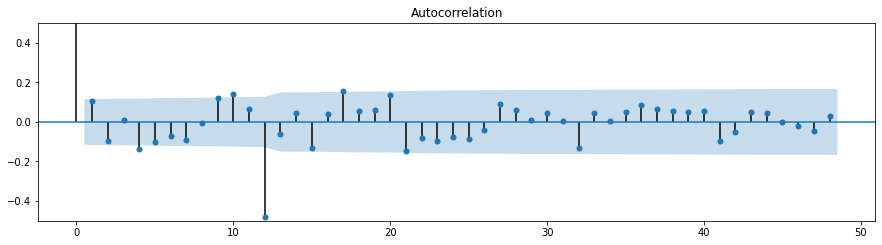

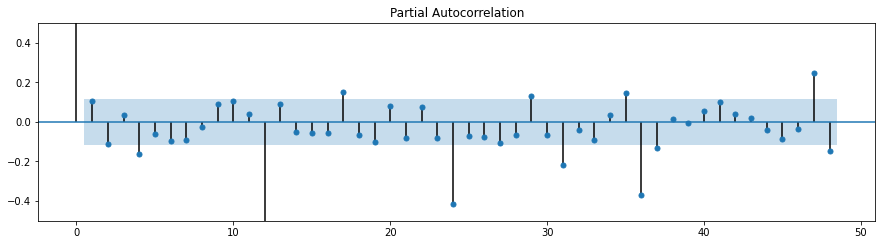

In [ ]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.High_box_diff_S_T[13:].values.squeeze(), lags = 48, ax=ax)
plt.ylim([-0.5,0.5])
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.High_box_diff_S_T[13:].values.squeeze(), lags = 48, ax=ax)
plt.ylim([-0.5,0.5])
pylab.show()

$Q = 1$, $q = 4$, $P = 4, p = 4$

In [ ]:
p = range(0, 5)
P = range(0, 5)
q = range(0, 5)
Q = range(0, 2)
d = 1
D = 1
parametrs = list(product(p, q, P, Q))

In [ ]:
print(len(parametrs))
print(parametrs[65])

250
(1, 1, 2, 1)


In [ ]:
%%time
results = []
best_aic = float('inf')
warnings.filterwarnings('ignore')
for param in parametrs:
  model = sm.tsa.statespace.SARIMAX(df_month.High_box, order = (param[0], d, param[1]),
                                    seasonal_order = (param[2], D, param[3], 12)).fit(disp=-1)
  aic = model.aic
  if aic < best_aic:
    best_model = model
    best_aic = aic
    best_param = param
  results.append([param, model.aic])
warnings.filterwarnings('default')

CPU times: user 1h 8min 3s, sys: 45min 12s, total: 1h 53min 15s
Wall time: 59min 18s


In [ ]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending = True)[:5])

       parameters         aic
191  (3, 4, 0, 1) -831.009424
213  (4, 1, 1, 1) -829.878387
43   (0, 4, 1, 1) -829.337795
241  (4, 4, 0, 1) -829.327700
45   (0, 4, 2, 1) -829.137284


In [ ]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                           High_box   No. Observations:                  300
Model:             SARIMAX(3, 1, 4)x(0, 1, 1, 12)   Log Likelihood                 424.505
Date:                            Tue, 10 May 2022   AIC                           -831.009
Time:                                    13:30:44   BIC                           -798.074
Sample:                                04-30-1997   HQIC                          -817.809
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2500      0.215      1.163      0.245      -0.171       0.672
ar.L2         -0.0288      0.199   

In [ ]:
model2 = sm.tsa.statespace.SARIMAX(df_month.High_box, order = (3, d, 4),
                                    seasonal_order = (0, D, 1, 12)).fit(disp=-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
model1 = sm.tsa.statespace.SARIMAX(df_month.High_box, order = (4, d, 10),
                                    seasonal_order = (4, D, 1, 12)).fit(disp=-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
model1.aic

-819.0435608052015

In [ ]:
print(model1.summary())

                                  Statespace Model Results                                 
Dep. Variable:                            High_box   No. Observations:                  300
Model:             SARIMAX(4, 1, 10)x(4, 1, 1, 12)   Log Likelihood                 429.522
Date:                             Thu, 12 May 2022   AIC                           -819.044
Time:                                     16:05:54   BIC                           -745.854
Sample:                                 04-30-1997   HQIC                          -789.710
                                      - 03-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2048      0.879     -0.233      0.816      -1.928       1.519
ar.L2          0.0252      

Критерий Стъюдента: p=0.674280
Критерий  Дики-Фуллера: p=0.000000


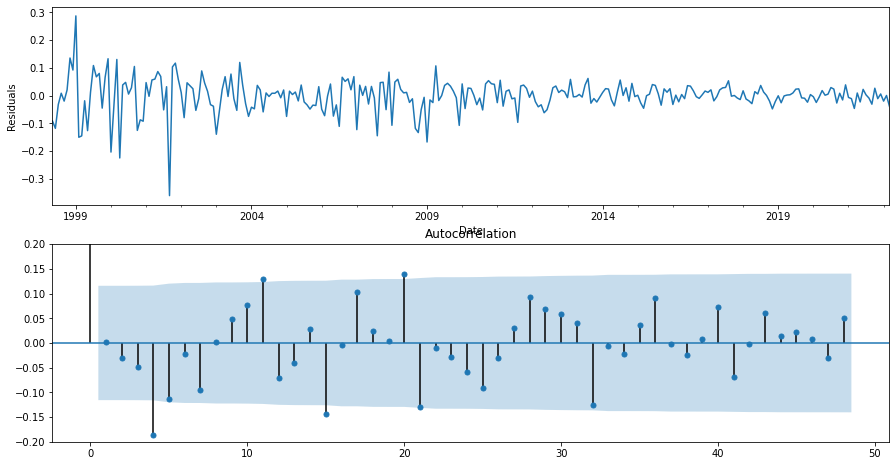

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(211)
model2.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(model2.resid[13:].values.squeeze(), lags = 48, ax=ax)
plt.ylim([-0.2, 0.2])

print('Критерий Стъюдента: p=%f' % stats.ttest_1samp(model2.resid[13:], 0)[1])
print('Критерий  Дики-Фуллера: p=%f' % sm.tsa.stattools.adfuller(model2.resid[13:])[1])

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(211)
model1.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(model1.resid[13:].values.squeeze(), lags = 48, ax=ax)
plt.ylim([-0.2, 0.2])

print('Критерий Стъюдента: p=%f' % stats.ttest_1samp(model1.resid[13:], 0)[1])
print('Критерий  Дики-Фуллера: p=%f' % sm.tsa.stattools.adfuller(model1.resid[13:])[1])

Критерий Стъюдента: p=0.869960
Критерий  Дики-Фуллера: p=0.000000


In [ ]:
def invboxcox(y, lmbda):
  if lmbda == 0:
    return(np.exp(y))
  else:
    return(np.exp(np.log(lmbda* y+1)/lmbda))

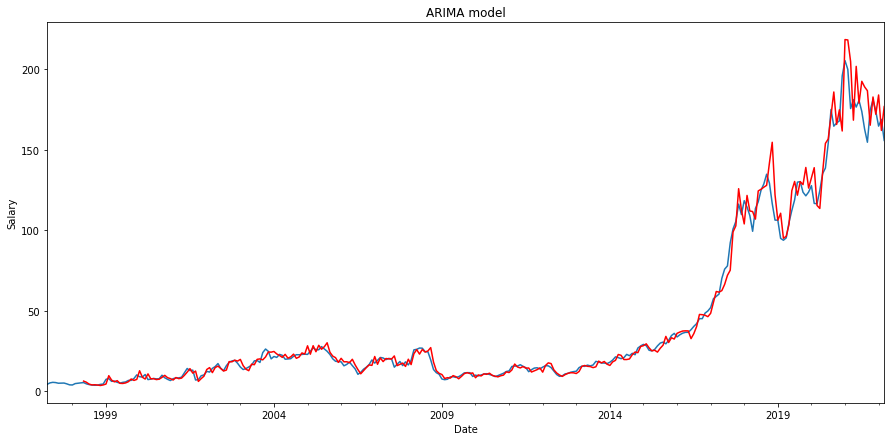

In [ ]:
df_month['model'] = invboxcox(model1.fittedvalues, lmbda)
plt.figure(figsize=(15,7))
df_month.High.plot()
df_month.model[13:].plot(color='r')
plt.ylabel('Salary')
plt.title('ARIMA model')
plt.show()

In [ ]:
df2 = df_month[['High']]
months = pd.date_range('2022-04-30', '2024-04-30', freq='M')
future = pd.DataFrame(index=months, columns=df2.columns)
df2 = pd.concat([df2, future])
df2['forecast'] = invboxcox(model1.predict(start=300, end=324), lmbda)

In [ ]:
df2

High    forecast
1997-04-30  4.440972         NaN
1997-05-31  5.305556         NaN
1997-06-30  5.644841         NaN
1997-07-31  5.494318         NaN
1997-08-31  5.098214         NaN
...              ...         ...
2023-12-31       NaN  302.525467
2024-01-31       NaN  310.633009
2024-02-29       NaN  290.420987
2024-03-31       NaN  271.919593
2024-04-30       NaN  281.353410

[325 rows x 2 columns]

In [ ]:
plt.figure(figsize=(15,7))
df2.High.plot()
df2.forecast.plot(color='r')
plt.ylabel('Salary')
plt.title('Prediction')
plt.show()

## Нейронки

In [ ]:
import tensorflow as tf

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
x_train = df['High']

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
shuffle_buffer_size = 1000
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(6000,)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
25/25 [==============================] - 15s 398ms/step - loss: 39.2709 - mae: 39.7709 - lr: 1.0000e-08
Epoch 2/100
25/25 [==============================] - 13s 498ms/step - loss: 39.2709 - mae: 39.7709 - lr: 1.1220e-08
Epoch 3/100
25/25 [==============================] - 10s 379ms/step - loss: 39.2709 - mae: 39.7709 - lr: 1.2589e-08
Epoch 4/100
25/25 [==============================] - 10s 377ms/step - loss: 39.2709 - mae: 39.7709 - lr: 1.4125e-08
Epoch 5/100
25/25 [==============================] - 10s 385ms/step - loss: 39.2709 - mae: 39.7709 - lr: 1.5849e-08
Epoch 6/100
25/25 [==============================] - 10s 375ms/step - loss: 39.2708 - mae: 39.7708 - lr: 1.7783e-08
Epoch 7/100
25/25 [==============================] - 10s 373ms/step - loss: 39.2708 - mae: 39.7708 - lr: 1.9953e-08
Epoch 8/100
25/25 [==============================] - 10s 376ms/step - loss: 39.2708 - mae: 39.7708 - lr: 2.2387e-08
Epoch 9/100
25/25 [==============================] - 17s 676ms/step - lo

KeyboardInterrupt: ignored

(1e-08, 0.0001, 0.0, 60.0)

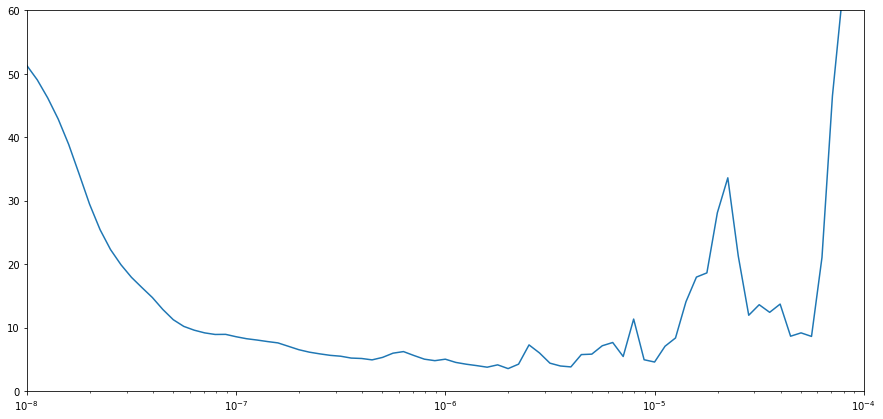

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [ ]:
split_time = 6000
time_train = df.index[:split_time]
x_train = df['High'][:split_time]
time_valid = df.index[split_time:]
x_valid = df['High'][split_time:]


In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])


optimizer = tf.keras.optimizers.SGD(learning_rate=4e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100
60/60 [==============================] - 18s 224ms/step - loss: 14.6975 - mae: 15.1805
Epoch 2/100
60/60 [==============================] - 9s 143ms/step - loss: 6.9291 - mae: 7.3985
Epoch 3/100
60/60 [==============================] - 9s 143ms/step - loss: 4.0840 - mae: 4.5292
Epoch 4/100
60/60 [==============================] - 9s 143ms/step - loss: 3.5521 - mae: 3.9739
Epoch 5/100
60/60 [==============================] - 9s 143ms/step - loss: 2.9356 - mae: 3.3397
Epoch 6/100
60/60 [==============================] - 12s 192ms/step - loss: 2.9764 - mae: 3.3725
Epoch 7/100
60/60 [==============================] - 9s 146ms/step - loss: 2.4383 - mae: 2.8369
Epoch 8/100
60/60 [==============================] - 9s 141ms/step - loss: 2.3884 - mae: 2.7682
Epoch 9/100
60/60 [==============================] - 9s 141ms/step - loss: 2.4541 - mae: 2.8473
Epoch 10/100
60/60 [==============================] - 9s 151ms/step - loss: 2.6816 - mae: 3.0826
Epoch 11/100
60/60 [===============

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
#train_set = windowed_dataset(x_train, window_size=128, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5, padding="causal", activation="relu", input_shape=[None, 1]),
  tf.keras.layers.SimpleRNN(128, return_sequences=True),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.SimpleRNN(64, return_sequences=True),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(1)
])


model1.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',
              metrics=["mae"])
history1 = model1.fit(train_set,epochs=100)

Epoch 1/100
63/63 [==============================] - 11s 128ms/step - loss: 25.5795 - mae: 26.0717
Epoch 2/100
63/63 [==============================] - 8s 123ms/step - loss: 14.1476 - mae: 14.6301
Epoch 3/100
63/63 [==============================] - 8s 123ms/step - loss: 12.4896 - mae: 12.9731
Epoch 4/100
63/63 [==============================] - 8s 124ms/step - loss: 11.1323 - mae: 11.6133
Epoch 5/100
63/63 [==============================] - 8s 125ms/step - loss: 10.1763 - mae: 10.6542
Epoch 6/100
63/63 [==============================] - 8s 127ms/step - loss: 10.5117 - mae: 10.9876
Epoch 7/100
63/63 [==============================] - 8s 124ms/step - loss: 9.8133 - mae: 10.2892
Epoch 8/100
63/63 [==============================] - 8s 123ms/step - loss: 9.5397 - mae: 10.0150
Epoch 9/100
63/63 [==============================] - 8s 124ms/step - loss: 9.5107 - mae: 9.9858
Epoch 10/100
63/63 [==============================] - 8s 123ms/step - loss: 8.9377 - mae: 9.4136
Epoch 11/100
63/63 [====

In [ ]:
rnn_forecast = model_forecast(model, df['High'][:, np.newaxis], window_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(df.index, df['High'])
plot_series(df.index[63:], rnn_forecast[:, -1, 0])

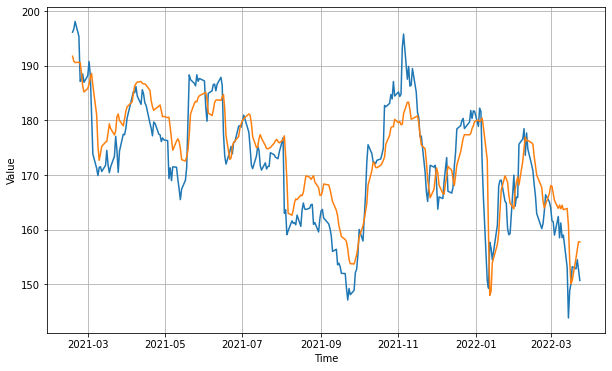

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast[split_time - window_size:-1, -1, 0])

In [ ]:
df2 = pd.DataFrame(rnn_forecast[:, -1, 0], index = df.index[63:])
df2 = pd.DataFrame(df2[0].resample("1M").mean())


In [ ]:
plt.figure(figsize=(10, 6))
plot_series(df_month.index, df_month['High'])
plot_series(df_month.index[3:], df2[0])


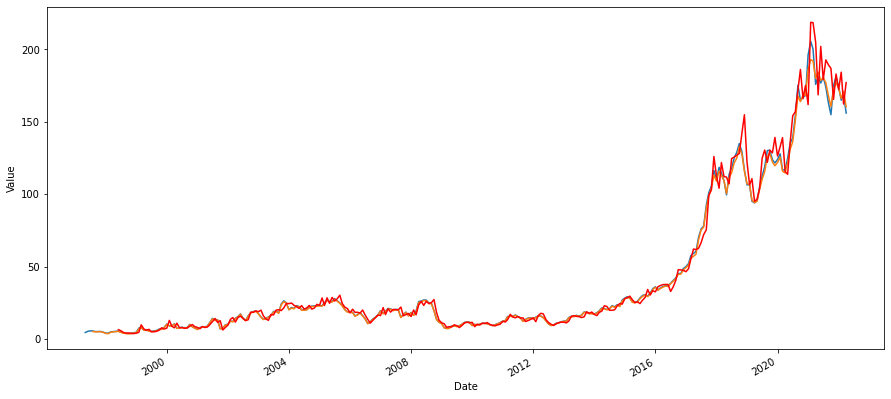

In [ ]:
plt.figure(figsize=(15,7))
plot_series(df_month.index, df_month['High'])
plot_series(df_month.index[3:], df2[0])
df_month.model[13:].plot(color='r')
plt.show()

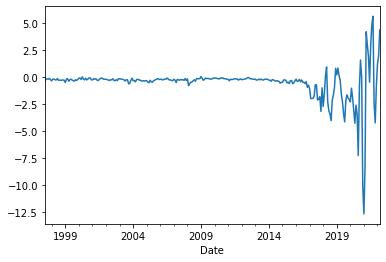

In [ ]:
(df2[0] - df_month[3:]['High']).plot()

(-0.8, 0.8)

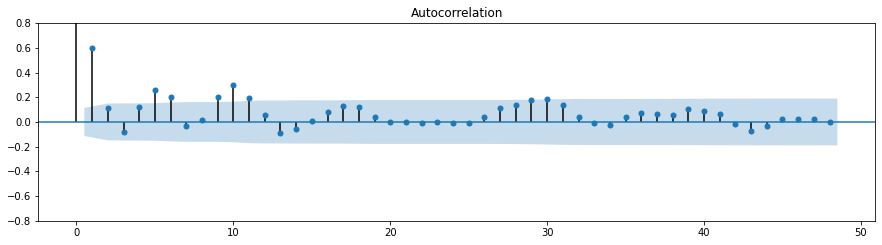

In [ ]:
plt.figure(figsize=(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf((df2[0] - df_month[3:]['High']).values.squeeze(), lags = 48, ax=ax)
plt.ylim([-0.8, 0.8])